LAB 1: Signal Processing Concepts Review 


1. DIGITAL FILTERS (20%) 
a. Digital filters are broadly classified into FIR and IIR filters. Give an example of an FIR filter and IIR filter (transfer function). Plot the transfer function in Python. Identify the poles and zeros on the plot. 

ANSWER:
The general form of digital filter transfer function is  
H(z)= (b0 + b1*z^-1 + b2*z^-2 + ...) / (a0 + a1*z^-1 + a2*z^-2+ ...)

Specifically for FIR filter, denominator is 1. H(z) can be described as,
H(z)= (b0 + b1*z^-1 + b2*z^-2 + ...)
We can tell that all poles of FIR are at z=0

Below is the plot of frequency response of such FIR transfer function in python:

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, tf2zpk, impulse, dimpulse

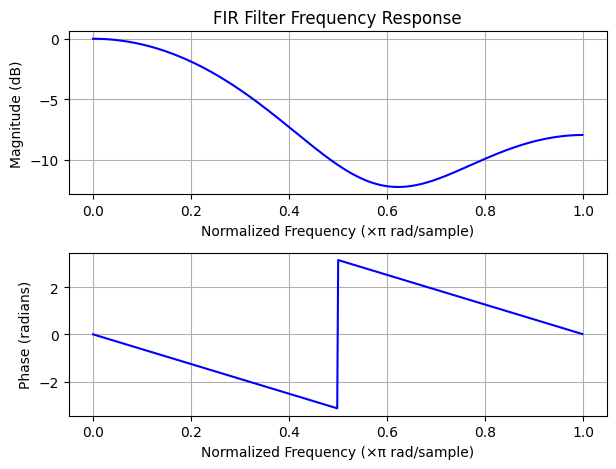

zeros:  [-0.61205361+2.01551115j -0.61205361-2.01551115j -0.13794639+0.45426165j
 -0.13794639-0.45426165j]
poles:  []


In [68]:
b = [0.1, 0.15, 0.5, 0.15, 0.1]
a = [1]

# w: freq array; h: freq resp as complex number
w, h = freqz(b, a)

# Magnitude response
plt.subplot(2, 1, 1)
plt.plot(w / np.pi, 20 * np.log10(abs(h)), 'b')
plt.title('FIR Filter Frequency Response')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid()

# Phase response
plt.subplot(2, 1, 2)
plt.plot(w / np.pi, np.angle(h), 'b')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Phase (radians)')
plt.grid()

plt.tight_layout()
plt.show()

# computer pole-zero
zeros, poles, _ = tf2zpk(b, a)
print("zeros: ", zeros)
print("poles: ", poles)

For IIR filter, the denominator has coeeficients (feedback).
Below is the plot of frequency response of an example IIR transfer function in python:

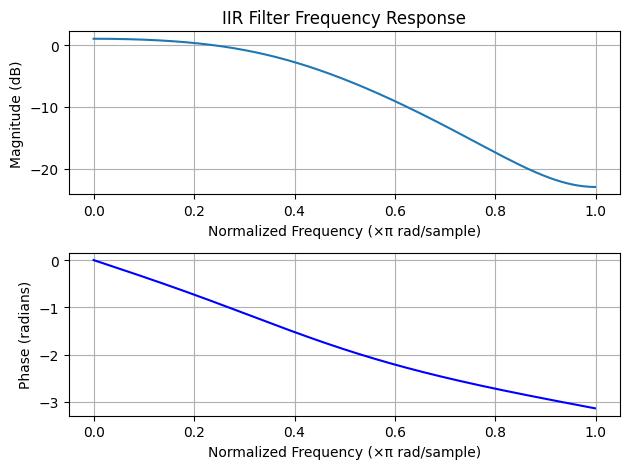

zeros:  [-2.  -0.5]
poles:  [0.15+0.27838822j 0.15-0.27838822j]


In [69]:
b = [0.2, 0.5, 0.2] 
a = [1, -0.3, 0.1]

w, h = freqz(b, a)

# Plot magnitude response
plt.subplot(2, 1, 1)
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.xlabel("Normalized Frequency (×π rad/sample)")
plt.ylabel("Magnitude (dB)")
plt.title("IIR Filter Frequency Response")
plt.grid()

# Phase response
plt.subplot(2, 1, 2)
plt.plot(w / np.pi, np.angle(h), 'b')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Phase (radians)')
plt.grid()

plt.tight_layout()
plt.show()

# computer pole-zero
zeros, poles, _ = tf2zpk(b, a)
print("zeros: ", zeros)
print("poles: ", poles)

b. Consider the transfer functions, H(z)=1+z^-1+z^-2+z^-3+z^-4
H(z)=(1+z^-1)/(1-z^-1)
Identify the FIR and IIR filter. Plot the FIR filter (use freqz function in SciPy signal processing toolbox). Where are the poles and zeros of the filter located? Validate your theory using simulations.


ANSWER: H(z)=1+z^-1+z^-2+z^-3+z^-4 is FIR filter since the denomimator is 1. For FIR, all poles are at 1.


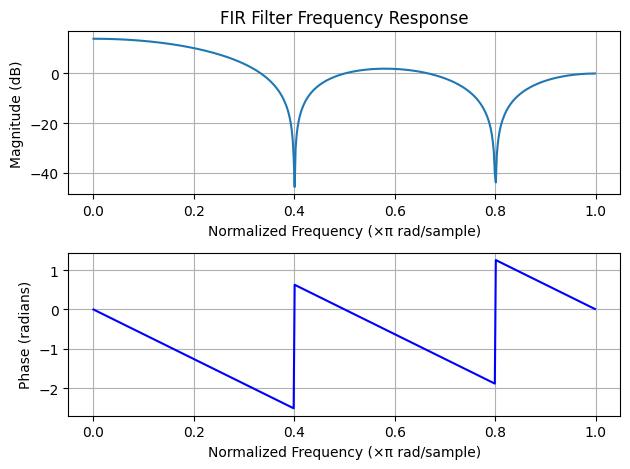

zeros:  [ 0.30901699+0.95105652j  0.30901699-0.95105652j -0.80901699+0.58778525j
 -0.80901699-0.58778525j]
poles:  []

Validating zeros:
H(0.3090+0.9511j) = 2.2204e-15+2.1649e-15j
H(0.3090-0.9511j) = 2.2204e-15-2.1649e-15j
H(-0.8090+0.5878j) = 2.2204e-16-6.6613e-16j
H(-0.8090-0.5878j) = 2.2204e-16+6.6613e-16j


In [70]:
b = [1, 1, 1, 1, 1] 
a = [1]

w, h = freqz(b, a)

# Plot magnitude response
plt.subplot(2, 1, 1)
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.xlabel("Normalized Frequency (×π rad/sample)")
plt.ylabel("Magnitude (dB)")
plt.title("FIR Filter Frequency Response")
plt.grid()

# Phase response
plt.subplot(2, 1, 2)
plt.plot(w / np.pi, np.angle(h), 'b')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Phase (radians)')
plt.grid()

plt.tight_layout()
plt.show()

zeros, poles, _ = tf2zpk(b, a)
print("zeros: ", zeros)
print("poles: ", poles)
print("")
print("Validating zeros:")

#verify zeros
for z in zeros:
    num = np.polyval(b,z)
    den = np.polyval(a,z)
    H = num / den
    print(f"H({z:.4f}) = {H:.4e}")


H(z)=(1+z^-1)/(1-z^-1) is IIR filter since denorminator has coefficients.

/home/sxie/.venv/lib/python3.8/site-packages/scipy/signal/_filter_design.py:480: RuntimeWarning: divide by zero encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
/home/sxie/.venv/lib/python3.8/site-packages/scipy/signal/_filter_design.py:480: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /


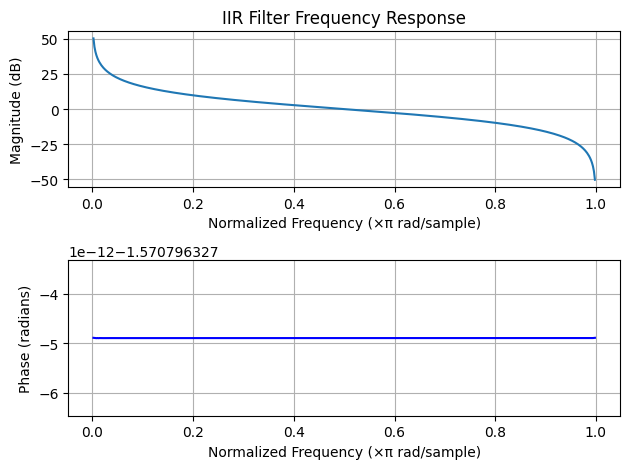

zeros:  [-1.]
poles:  [1.]

Validating zeros:
H(-1.0000) = -0.0000e+00

Validating poles:
H(1.0000) = inf


/tmp/ipykernel_4790/2860443759.py:43: RuntimeWarning: divide by zero encountered in scalar divide
  H = num / den


In [71]:
b = [1, 1] 
a = [1, -1]

w, h = freqz(b, a)

# Plot magnitude response
plt.subplot(2, 1, 1)
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.xlabel("Normalized Frequency (×π rad/sample)")
plt.ylabel("Magnitude (dB)")
plt.title("IIR Filter Frequency Response")
plt.grid()

# Phase response
plt.subplot(2, 1, 2)
plt.plot(w / np.pi, np.angle(h), 'b')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Phase (radians)')
plt.grid()

plt.tight_layout()
plt.show()

zeros, poles, _ = tf2zpk(b, a)
print("zeros: ", zeros)
print("poles: ", poles)
print("")
print("Validating zeros:")

#verify zeros
for z in zeros:
    num = np.polyval(b,z)
    den = np.polyval(a,z)
    H = num / den
    print(f"H({z:.4f}) = {H:.4e}")

print("")
print("Validating poles:")
#verify poles
for z in poles:
    num = np.polyval(b,z)
    den = np.polyval(a,z)
    H = num / den
    print(f"H({z:.4f}) = {H:.4e}")

c. Comment on the stability of the FIR and IIR filters. Use simple simulations to explain your ideas.

ANSWER:
Stability of transfer function is related to locations of poles.
- FIR filters are always stable since all poles are at the origin (z=0) which means all poles lie within the unit circle in z-plane
- IIR filters can be unstable if any pole lies outside the unit circle (|z|>1)

Below impulse responses of FIR and IIR are simulated. It shows FIR can decay naturally. IIR decays and fluctuates slowly.

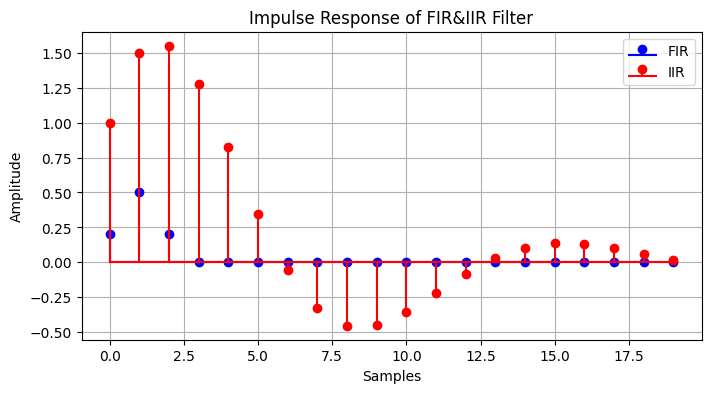

In [72]:
from scipy.signal import lfilter, unit_impulse

b_fir=[0.2, 0.5, 0.2] 
a_fir=[1]

b_iir = [1]
a_iir = [1, -1.5, 0.7]

impulse = unit_impulse(20)
ir_fir = lfilter(b_fir, a_fir, impulse)
ir_iir = lfilter(b_iir, a_iir, impulse)

plt.figure(figsize=(8,4))
plt.stem(ir_fir, markerfmt='bo', linefmt='b-', basefmt="b", label="FIR")
plt.stem(ir_iir, markerfmt='ro', linefmt='r-', basefmt="r", label="IIR")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Impulse Response of FIR&IIR Filter")
plt.legend()
plt.grid()
plt.show()

2. SAMPLING

a. Consider the two signals 𝑥1(𝑡)=𝑐os(2*𝜋∙𝐹1∙𝑡) and 𝑥2(𝑡)=𝑐os(2𝜋∙𝐹2∙𝑡), where F1 = 300MHz and F2 = 800MHz. Both these signals are sampled at the same sampling frequency Fs = 500MHz. What can you say about the sampled data x1(n) and x2(n)? Explain with simulations why this happens.

ANSWER:
Nyquist frequency of sample clock is 0.5*Fs = 250MHz. Both signal frequencies are above Nyquist frequency and will alias into lower frequencies.
Aliased clock frequency Fa = abs(Fin - k*Fs)
- Fa is within [0, Fs/2]
- k is the closest integer

For F1 = 300MHz, k1 = round(300/500) = 1, Fa1 = abs(300-1*500) = 200MHz
For F2 = 800MHz, k2 = round(800/500) = 2, Fa2 = abs(800-2*500) = 200MHz
Thus boith signals 𝑥1(𝑡) and 𝑥2(𝑡) alias to 200MHz when sampled at 500MHz.

Below is the simulation.

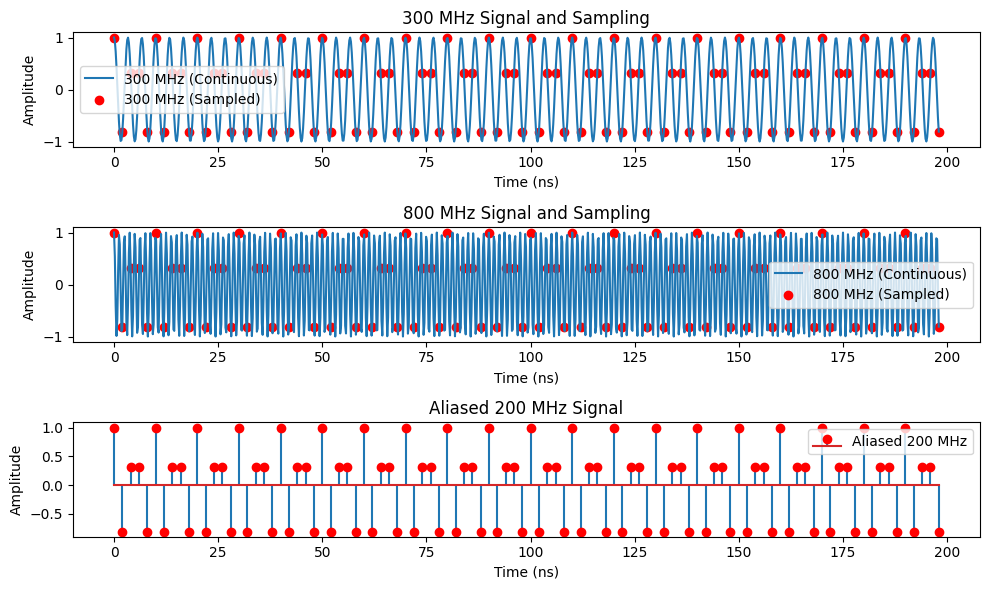

In [73]:
Fs = 500e6
Ts = 1 / Fs
N = 100

F1 = 300e6
F2 = 800e6

t = np.linspace(0, (N-1)*Ts, N*10)  # High-resolution
t_sampled = np.linspace(0, (N-1)*Ts, N)  # Sampled time points

x1 = np.cos(2 * np.pi * F1 * t)
x2 = np.cos(2 * np.pi * F2 * t)

# Sampled signals
x1_sampled = np.cos(2 * np.pi * F1 * t_sampled)
x2_sampled = np.cos(2 * np.pi * F2 * t_sampled)

# Aliased frequency (200 MHz)
f_alias = 200e6
alias_signal = np.cos(2 * np.pi * f_alias * t_sampled)

# Plot signals
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t * 1e9, x1, label="300 MHz (Continuous)")
plt.scatter(t_sampled * 1e9, x1_sampled, color='red', label="300 MHz (Sampled)")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("300 MHz Signal and Sampling")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t * 1e9, x2, label="800 MHz (Continuous)")
plt.scatter(t_sampled * 1e9, x2_sampled, color='red', label="800 MHz (Sampled)")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("800 MHz Signal and Sampling")
plt.legend()

plt.subplot(3, 1, 3)
plt.stem(t_sampled * 1e9, alias_signal, markerfmt='ro', label="Aliased 200 MHz")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Aliased 200 MHz Signal")
plt.legend()

plt.tight_layout()
plt.show()


b. Can you recover the signals x1(t) and x2(t) from x1(n) and x2(n). If not, what is your suggestion to overcome this problem?

ANSWER: x1(t) and x2(t) cannot be recovered from x1(n) and x2(n) since they are under-sampled and make no difference to 300MHz signal.

c. Find the ideal signal reconstruction (interpolation) equation for a zero-order hold sampling system with pulse width W and sampling rate T. Assume that Nyquist rate criteria is satisfied and the sampling point is at the end of the pulse width.

ANSWER: see separate PDF file

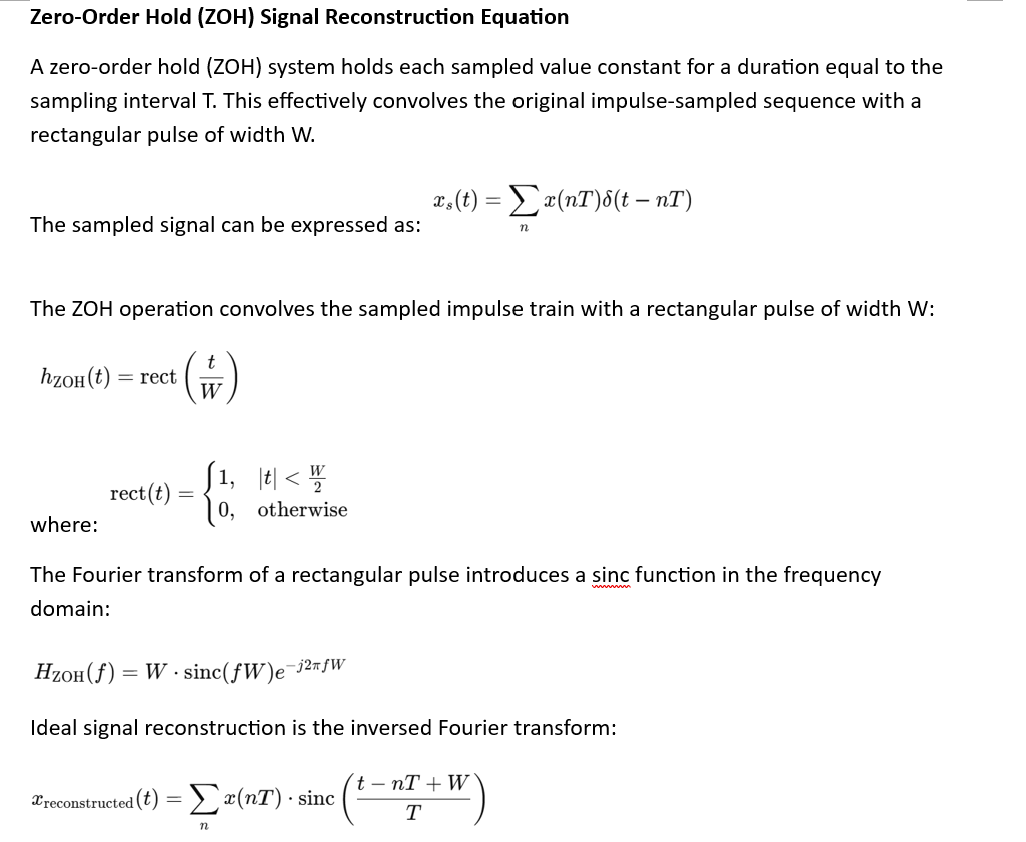

d. Sample the signal x1(t) using Fs = 800MHz at 0:Ts:T-Ts, where T = 10/F1 (i.e. 10 cycles of the cosine wave) and Ts = 1/Fs. Reconstruct the signal from the samples using the formula,

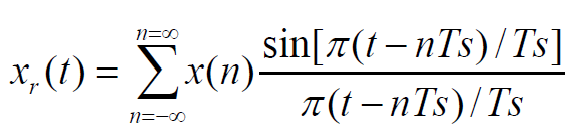
Now sample the signal at Ts/2:Ts:T-Ts/2 i.e. the samples are shifted by Ts/2. Reconstruct the signal using the same formula. Compute the mean square error (MSE) in the reconstruction in both the cases by using,
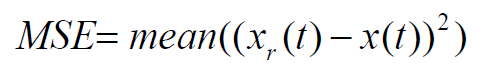

Mean Square Error (MSE) for Reconstruction: 0.007488


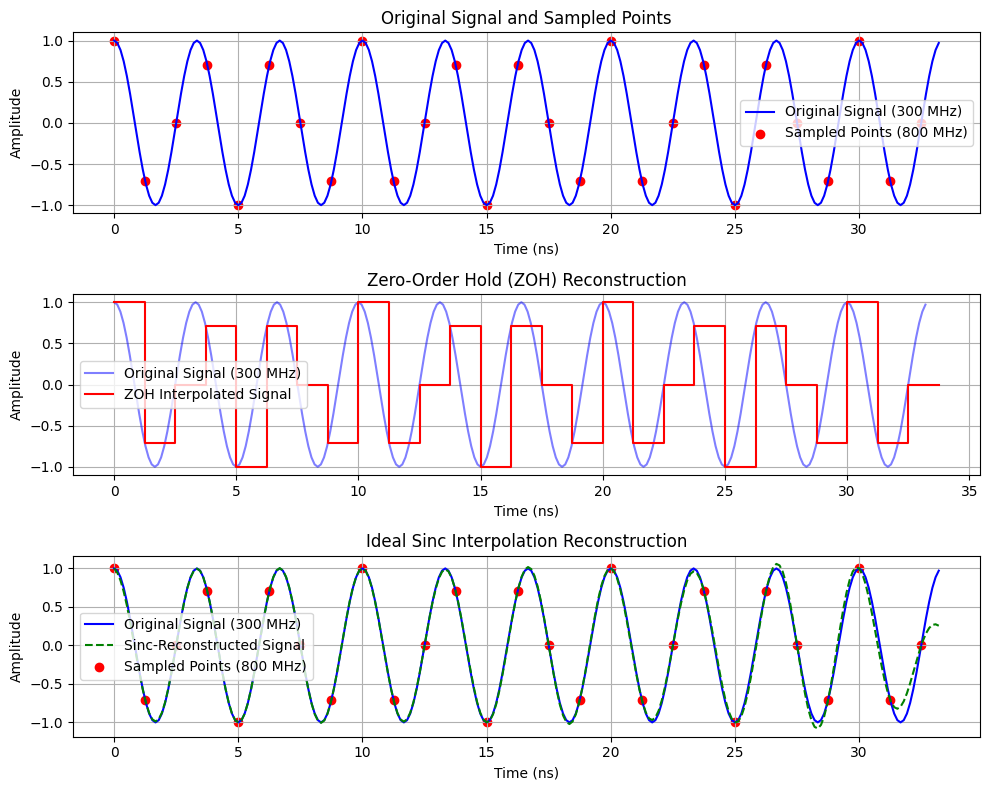

In [74]:
f_signal = 300e6  
fs_sample = 800e6 
T_sample = 1 / fs_sample 
duration = 10/f_signal
num_samples = int(duration * fs_sample)  # Number of samples

t_cont = np.linspace(0, duration, num_samples * 10, endpoint=False)  # High-resolution time vector
t_sampled = np.arange(0, duration, T_sample)  # Sampled time points

x_cont = np.cos(2 * np.pi * f_signal * t_cont)
x_sampled = np.cos(2 * np.pi * f_signal * t_sampled)

# Zero-Order Hold (ZOH) Interpolation
t_zoh = np.repeat(t_sampled, 2)[1:]  # Duplicate time points for step effect
x_zoh = np.repeat(x_sampled, 2)  # Hold each sample constant
t_zoh = np.append(t_zoh, t_sampled[-1] + T_sample)  # Extend last sample for visualization

# Sinc Interpolation Function
def sinc_interp(x_sampled, t_sampled, t_cont, T):
    return np.sum(x_sampled[:, np.newaxis] * np.sinc((t_cont - t_sampled[:, np.newaxis]) / T), axis=0)

x_sinc_recon = sinc_interp(x_sampled, t_sampled, t_cont, T_sample)

mse_sinc = np.mean((x_cont - x_sinc_recon) ** 2)
print(f"Mean Square Error (MSE) for Reconstruction: {mse_sinc:.6f}")


# Plot results
plt.figure(figsize=(10, 8))

# Original Signal and Sampled Points
plt.subplot(3, 1, 1)
plt.plot(t_cont * 1e9, x_cont, label="Original Signal (300 MHz)", color='blue')
plt.scatter(t_sampled * 1e9, x_sampled, color='red', label="Sampled Points (800 MHz)")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Original Signal and Sampled Points")
plt.legend()
plt.grid()

# Zero-Order Hold (ZOH) Reconstruction
plt.subplot(3, 1, 2)
plt.plot(t_cont * 1e9, x_cont, 'b', alpha=0.5, label="Original Signal (300 MHz)")
plt.step(t_zoh * 1e9, x_zoh, where='post', color='red', label="ZOH Interpolated Signal")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Zero-Order Hold (ZOH) Reconstruction")
plt.legend()
plt.grid()

# Sinc Interpolation Reconstruction
plt.subplot(3, 1, 3)
plt.plot(t_cont * 1e9, x_cont, 'b', label="Original Signal (300 MHz)")
plt.plot(t_cont * 1e9, x_sinc_recon, 'g--', label="Sinc-Reconstructed Signal")
plt.scatter(t_sampled * 1e9, x_sampled, color='red', label="Sampled Points (800 MHz)")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Ideal Sinc Interpolation Reconstruction")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



Change sample points to Ts/2:Ts:T-Ts/2, MSE has changed from 0.007488 to 0.004214

Mean Square Error (MSE) for Reconstruction: 0.004214


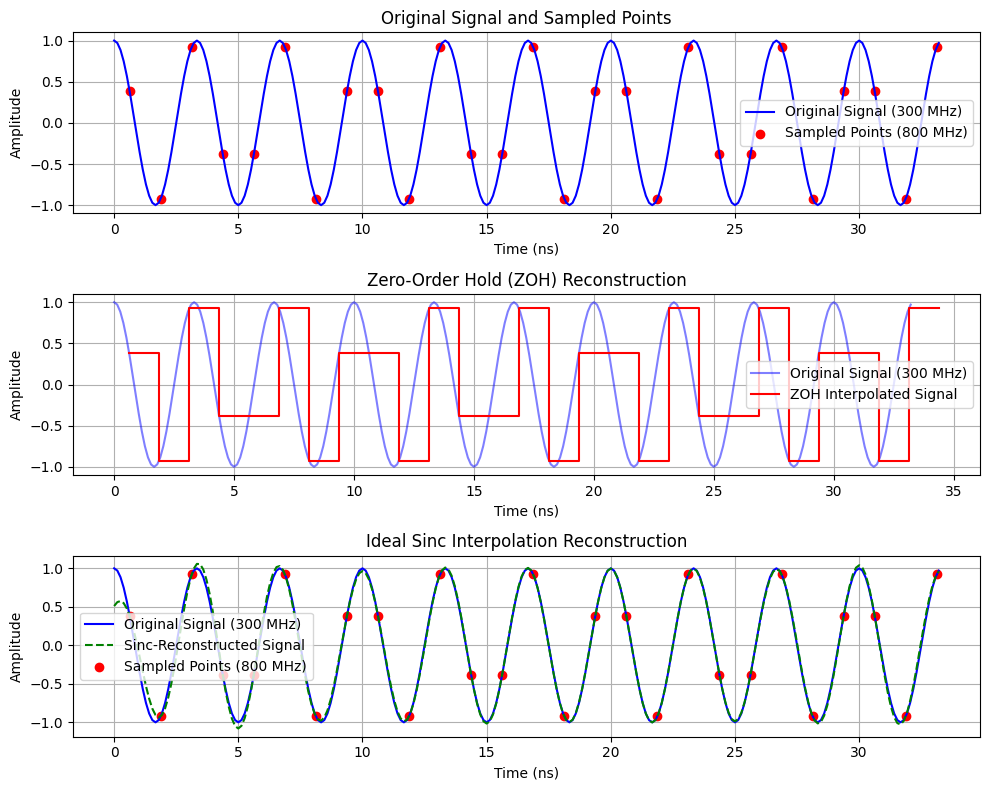

In [75]:
f_signal = 300e6  
fs_sample = 800e6 
T_sample = 1 / fs_sample 
duration = 10/f_signal
num_samples = int(duration * fs_sample)  # Number of samples

t_cont = np.linspace(0, duration, num_samples * 10, endpoint=False)  # High-resolution time vector
t_sampled = np.arange(0.5*T_sample, duration, T_sample)  # Sampled time points

x_cont = np.cos(2 * np.pi * f_signal * t_cont)
x_sampled = np.cos(2 * np.pi * f_signal * t_sampled)

# Zero-Order Hold (ZOH) Interpolation
t_zoh = np.repeat(t_sampled, 2)[1:]  # Duplicate time points for step effect
x_zoh = np.repeat(x_sampled, 2)  # Hold each sample constant
t_zoh = np.append(t_zoh, t_sampled[-1] + T_sample)  # Extend last sample for visualization

# Sinc Interpolation Function
def sinc_interp(x_sampled, t_sampled, t_cont, T):
    return np.sum(x_sampled[:, np.newaxis] * np.sinc((t_cont - t_sampled[:, np.newaxis]) / T), axis=0)

x_sinc_recon = sinc_interp(x_sampled, t_sampled, t_cont, T_sample)

mse_sinc = np.mean((x_cont - x_sinc_recon) ** 2)
print(f"Mean Square Error (MSE) for Reconstruction: {mse_sinc:.6f}")


# Plot results
plt.figure(figsize=(10, 8))

# Original Signal and Sampled Points
plt.subplot(3, 1, 1)
plt.plot(t_cont * 1e9, x_cont, label="Original Signal (300 MHz)", color='blue')
plt.scatter(t_sampled * 1e9, x_sampled, color='red', label="Sampled Points (800 MHz)")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Original Signal and Sampled Points")
plt.legend()
plt.grid()

# Zero-Order Hold (ZOH) Reconstruction
plt.subplot(3, 1, 2)
plt.plot(t_cont * 1e9, x_cont, 'b', alpha=0.5, label="Original Signal (300 MHz)")
plt.step(t_zoh * 1e9, x_zoh, where='post', color='red', label="ZOH Interpolated Signal")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Zero-Order Hold (ZOH) Reconstruction")
plt.legend()
plt.grid()

# Sinc Interpolation Reconstruction
plt.subplot(3, 1, 3)
plt.plot(t_cont * 1e9, x_cont, 'b', label="Original Signal (300 MHz)")
plt.plot(t_cont * 1e9, x_sinc_recon, 'g--', label="Sinc-Reconstructed Signal")
plt.scatter(t_sampled * 1e9, x_sampled, color='red', label="Sampled Points (800 MHz)")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Ideal Sinc Interpolation Reconstruction")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



e. Repeat d. for Fs = 1000MHz and Fs = 500MHz. Report your observations.

Mean Square Error (MSE) for Reconstruction: 0.001350


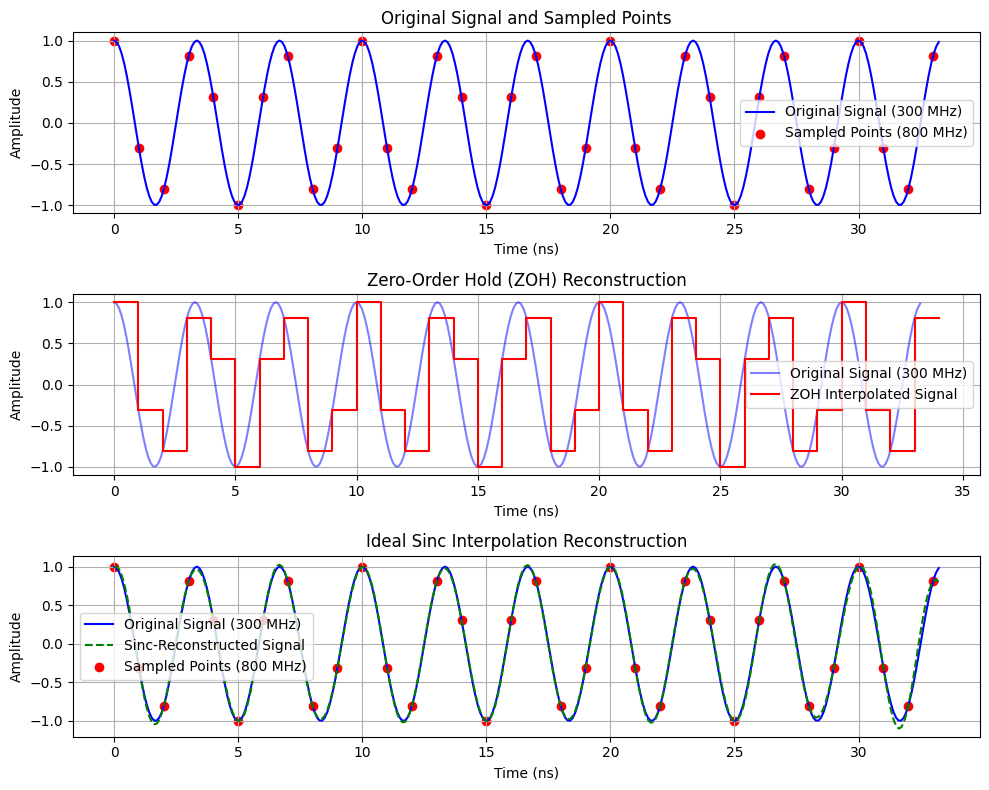

In [76]:
f_signal = 300e6  
fs_sample = 1000e6 # sample clock as 1000MHz
T_sample = 1 / fs_sample 
duration = 10/f_signal
num_samples = int(duration * fs_sample)  # Number of samples

t_cont = np.linspace(0, duration, num_samples * 10, endpoint=False)  # High-resolution time vector
t_sampled = np.arange(0, duration, T_sample)  # Sampled time points

x_cont = np.cos(2 * np.pi * f_signal * t_cont)
x_sampled = np.cos(2 * np.pi * f_signal * t_sampled)

# Zero-Order Hold (ZOH) Interpolation
t_zoh = np.repeat(t_sampled, 2)[1:]  # Duplicate time points for step effect
x_zoh = np.repeat(x_sampled, 2)  # Hold each sample constant
t_zoh = np.append(t_zoh, t_sampled[-1] + T_sample)  # Extend last sample for visualization

# Sinc Interpolation Function
def sinc_interp(x_sampled, t_sampled, t_cont, T):
    return np.sum(x_sampled[:, np.newaxis] * np.sinc((t_cont - t_sampled[:, np.newaxis]) / T), axis=0)

x_sinc_recon = sinc_interp(x_sampled, t_sampled, t_cont, T_sample)

mse_sinc = np.mean((x_cont - x_sinc_recon) ** 2)
print(f"Mean Square Error (MSE) for Reconstruction: {mse_sinc:.6f}")


# Plot results
plt.figure(figsize=(10, 8))

# Original Signal and Sampled Points
plt.subplot(3, 1, 1)
plt.plot(t_cont * 1e9, x_cont, label="Original Signal (300 MHz)", color='blue')
plt.scatter(t_sampled * 1e9, x_sampled, color='red', label="Sampled Points (800 MHz)")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Original Signal and Sampled Points")
plt.legend()
plt.grid()

# Zero-Order Hold (ZOH) Reconstruction
plt.subplot(3, 1, 2)
plt.plot(t_cont * 1e9, x_cont, 'b', alpha=0.5, label="Original Signal (300 MHz)")
plt.step(t_zoh * 1e9, x_zoh, where='post', color='red', label="ZOH Interpolated Signal")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Zero-Order Hold (ZOH) Reconstruction")
plt.legend()
plt.grid()

# Sinc Interpolation Reconstruction
plt.subplot(3, 1, 3)
plt.plot(t_cont * 1e9, x_cont, 'b', label="Original Signal (300 MHz)")
plt.plot(t_cont * 1e9, x_sinc_recon, 'g--', label="Sinc-Reconstructed Signal")
plt.scatter(t_sampled * 1e9, x_sampled, color='red', label="Sampled Points (800 MHz)")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Ideal Sinc Interpolation Reconstruction")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



Mean Square Error (MSE) for Reconstruction: 0.974680


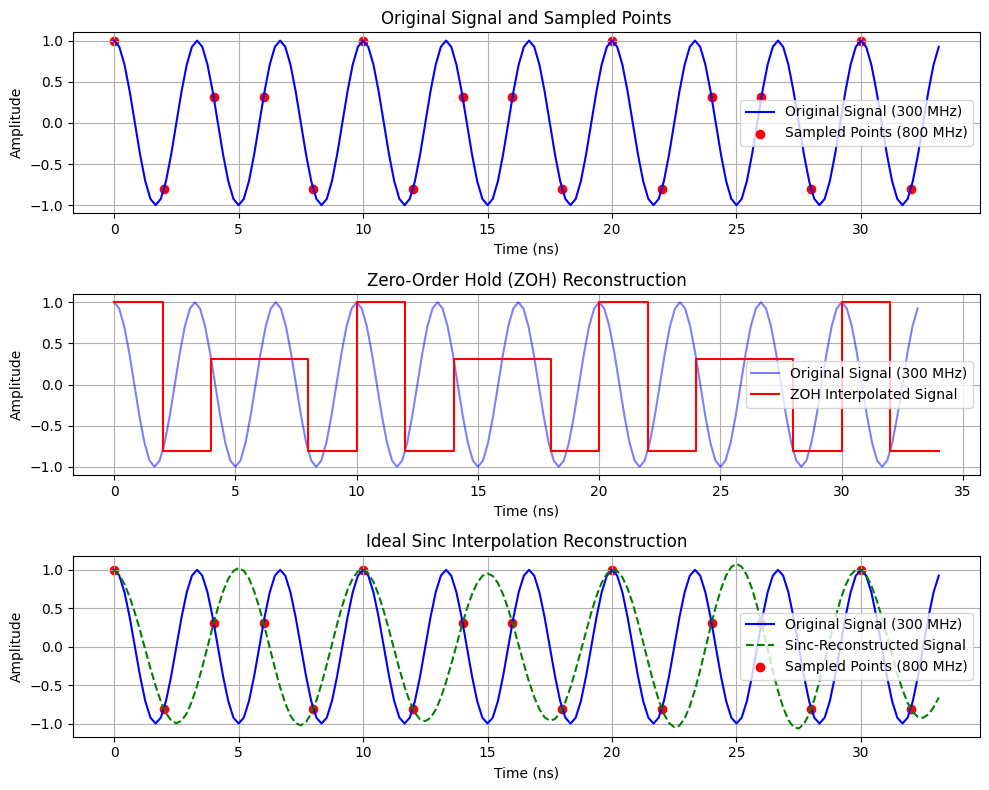

In [77]:
f_signal = 300e6  
fs_sample = 500e6 # sample clock as 500MHz
T_sample = 1 / fs_sample 
duration = 10/f_signal
num_samples = int(duration * fs_sample)  # Number of samples

t_cont = np.linspace(0, duration, num_samples * 10, endpoint=False)  # High-resolution time vector
t_sampled = np.arange(0, duration, T_sample)  # Sampled time points

x_cont = np.cos(2 * np.pi * f_signal * t_cont)
x_sampled = np.cos(2 * np.pi * f_signal * t_sampled)

# Zero-Order Hold (ZOH) Interpolation
t_zoh = np.repeat(t_sampled, 2)[1:]  # Duplicate time points for step effect
x_zoh = np.repeat(x_sampled, 2)  # Hold each sample constant
t_zoh = np.append(t_zoh, t_sampled[-1] + T_sample)  # Extend last sample for visualization

# Sinc Interpolation Function
def sinc_interp(x_sampled, t_sampled, t_cont, T):
    return np.sum(x_sampled[:, np.newaxis] * np.sinc((t_cont - t_sampled[:, np.newaxis]) / T), axis=0)

x_sinc_recon = sinc_interp(x_sampled, t_sampled, t_cont, T_sample)

mse_sinc = np.mean((x_cont - x_sinc_recon) ** 2)
print(f"Mean Square Error (MSE) for Reconstruction: {mse_sinc:.6f}")


# Plot results
plt.figure(figsize=(10, 8))

# Original Signal and Sampled Points
plt.subplot(3, 1, 1)
plt.plot(t_cont * 1e9, x_cont, label="Original Signal (300 MHz)", color='blue')
plt.scatter(t_sampled * 1e9, x_sampled, color='red', label="Sampled Points (800 MHz)")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Original Signal and Sampled Points")
plt.legend()
plt.grid()

# Zero-Order Hold (ZOH) Reconstruction
plt.subplot(3, 1, 2)
plt.plot(t_cont * 1e9, x_cont, 'b', alpha=0.5, label="Original Signal (300 MHz)")
plt.step(t_zoh * 1e9, x_zoh, where='post', color='red', label="ZOH Interpolated Signal")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Zero-Order Hold (ZOH) Reconstruction")
plt.legend()
plt.grid()

# Sinc Interpolation Reconstruction
plt.subplot(3, 1, 3)
plt.plot(t_cont * 1e9, x_cont, 'b', label="Original Signal (300 MHz)")
plt.plot(t_cont * 1e9, x_sinc_recon, 'g--', label="Sinc-Reconstructed Signal")
plt.scatter(t_sampled * 1e9, x_sampled, color='red', label="Sampled Points (800 MHz)")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.title("Ideal Sinc Interpolation Reconstruction")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



Once signal is under-sampled (sample clock is 500MHz), the reconstructed signal is input signal alias and MSE has increased significantly

3. DISCRETE FOURIER TRANSFORM (30%)

a. Consider the signal 𝑥(𝑡)=𝑐os(2*𝜋∙𝐹∙𝑡) where F = 2MHz. Sample the signal at Fs = 5MHz. Compute a 64 point DFT in Python and plot the output. (see fft command in SciPy documentation).

/tmp/ipykernel_4790/371306474.py:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freqs_shifted / 1e6, X_shifted, use_line_collection=True)


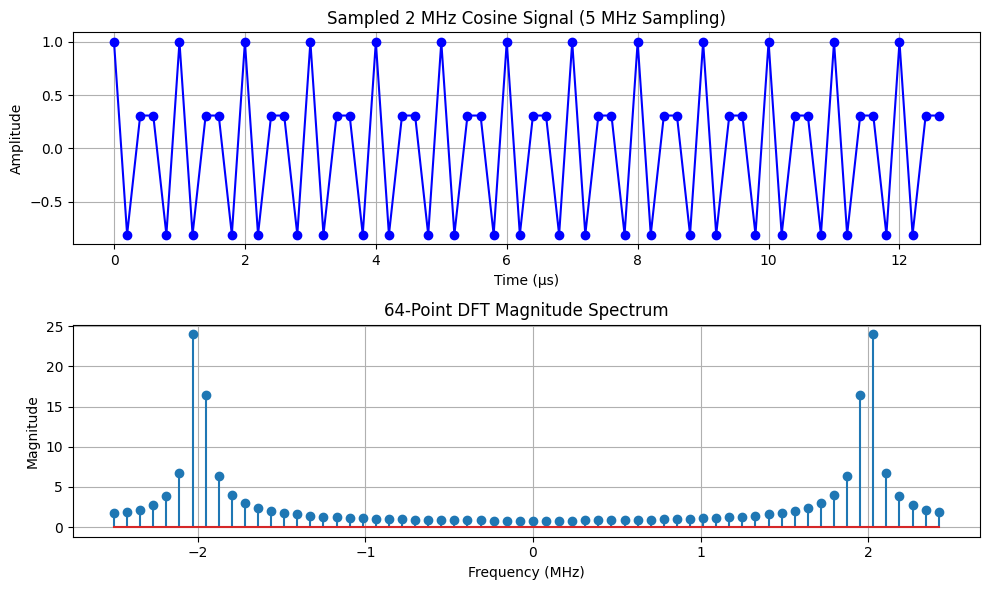

In [78]:
fs = 5e6
f_signal = 2e6
N = 64

t_sampled = np.arange(N) / fs

x_sampled = np.cos(2 * np.pi * f_signal * t_sampled)

# Compute 64-point DFT using FFT
X = np.fft.fft(x_sampled, N)
X_magnitude = np.abs(X) 
freqs = np.fft.fftfreq(N, 1/fs)

# Shift frequencies for centered spectrum
X_shifted = np.fft.fftshift(X_magnitude)
freqs_shifted = np.fft.fftshift(freqs)


plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_sampled * 1e6, x_sampled, marker='o', linestyle='-', color='b')
plt.xlabel("Time (µs)")
plt.ylabel("Amplitude")
plt.title("Sampled 2 MHz Cosine Signal (5 MHz Sampling)")
plt.grid()

# Plot 64-point DFT magnitude spectrum
plt.subplot(2, 1, 2)
plt.stem(freqs_shifted / 1e6, X_shifted, use_line_collection=True)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("64-Point DFT Magnitude Spectrum")
plt.grid()

plt.tight_layout()
plt.show()


b. Consider another signal 𝑦(𝑡)=𝑐os(2*𝜋∙𝐹1∙𝑡)+𝑐os(2*𝜋∙𝐹2∙𝑡) where F1 = 200MHz and F2 = 400MHz. Sample this signal at Fs = 1GHz. Compute and plot a 64 point DFT. Can you identify the two components of the signal in the plot?

ANSWER: yes, two frequency components can be identified after DFT

/tmp/ipykernel_4790/2662269405.py:31: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freqs_shifted / 1e6, X_shifted, use_line_collection=True)


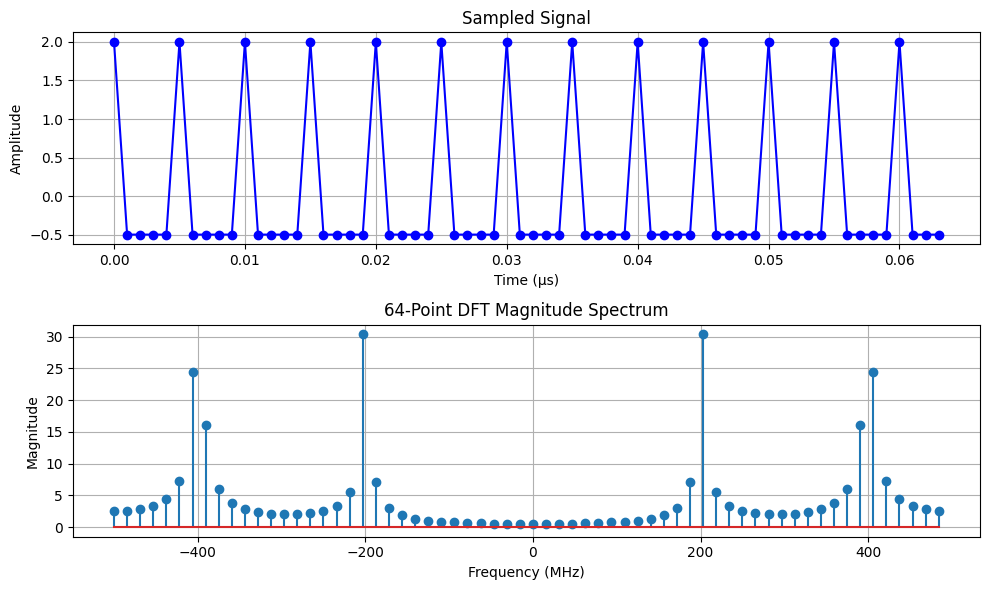

In [79]:
fs = 1000e6     
f1 = 200e6
f2 = 400e6
N = 64        

t_sampled = np.arange(N) / fs

x_sampled = np.cos(2 * np.pi * f1 * t_sampled) + np.cos(2 * np.pi * f2 * t_sampled)

# Compute 64-point DFT using FFT
X = np.fft.fft(x_sampled, N)
X_magnitude = np.abs(X) 
freqs = np.fft.fftfreq(N, 1/fs)

# Shift frequencies for centered spectrum
X_shifted = np.fft.fftshift(X_magnitude)
freqs_shifted = np.fft.fftshift(freqs)


plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_sampled * 1e6, x_sampled, marker='o', linestyle='-', color='b')
plt.xlabel("Time (µs)")
plt.ylabel("Amplitude")
plt.title("Sampled Signal")
plt.grid()

# Plot 64-point DFT magnitude spectrum
plt.subplot(2, 1, 2)
plt.stem(freqs_shifted / 1e6, X_shifted, use_line_collection=True)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("64-Point DFT Magnitude Spectrum")
plt.grid()

plt.tight_layout()
plt.show()


c. Repeat b. using Fs = 500MHz. Explain what you observe in your DFT plot.
ANSWER: since Fs is lower than 2*Nyquist frequency, DFT frequency components are aliasing signal. Instead of 200MHz and 400MHz, frequency compoent after DFT is 200MHz and 100MHz (abs(400-1*500)).

/tmp/ipykernel_4790/2143174026.py:31: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freqs_shifted / 1e6, X_shifted, use_line_collection=True)


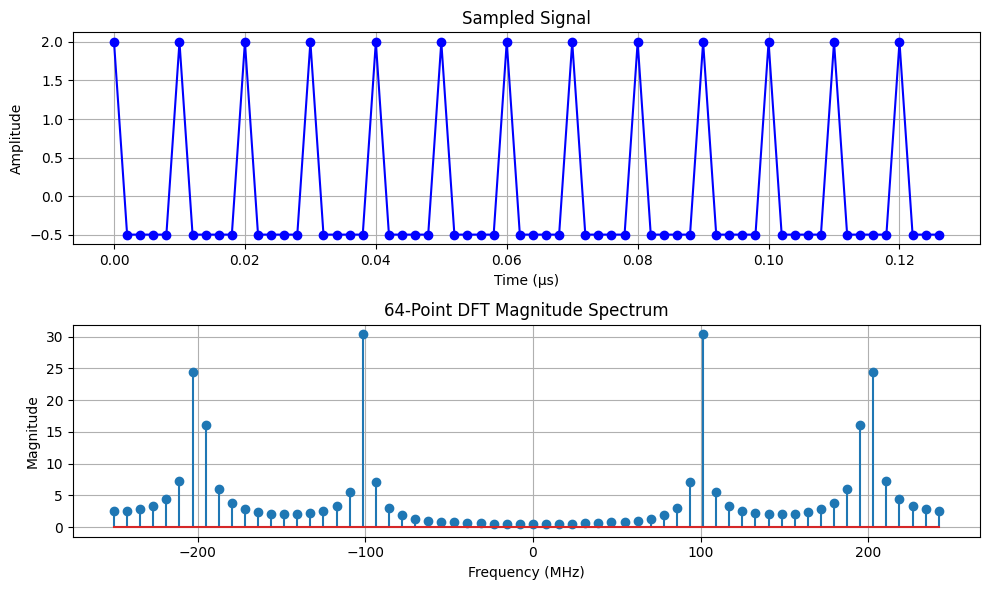

In [80]:
fs = 500e6     
f1 = 200e6
f2 = 400e6
N = 64        

t_sampled = np.arange(N) / fs

x_sampled = np.cos(2 * np.pi * f1 * t_sampled) + np.cos(2 * np.pi * f2 * t_sampled)

# Compute 64-point DFT using FFT
X = np.fft.fft(x_sampled, N)
X_magnitude = np.abs(X) 
freqs = np.fft.fftfreq(N, 1/fs)

# Shift frequencies for centered spectrum
X_shifted = np.fft.fftshift(X_magnitude)
freqs_shifted = np.fft.fftshift(freqs)


plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_sampled * 1e6, x_sampled, marker='o', linestyle='-', color='b')
plt.xlabel("Time (µs)")
plt.ylabel("Amplitude")
plt.title("Sampled Signal")
plt.grid()

# Plot 64-point DFT magnitude spectrum
plt.subplot(2, 1, 2)
plt.stem(freqs_shifted / 1e6, X_shifted, use_line_collection=True)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("64-Point DFT Magnitude Spectrum")
plt.grid()

plt.tight_layout()
plt.show()

d. Now apply a Blackman window as an envelope to the signal x(t) and y(t) and repeat the analysis. Please explain the differences.

/tmp/ipykernel_4790/1148167515.py:35: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freqs_shifted / 1e6, X_shifted, use_line_collection=True)


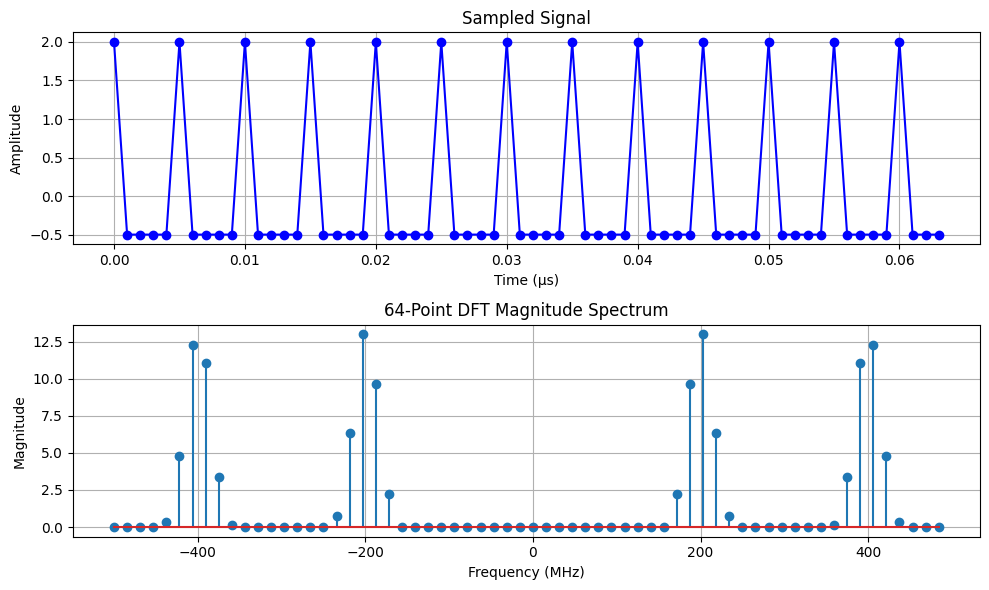

In [81]:
fs = 1000e6     
f1 = 200e6
f2 = 400e6
N = 64        

t_sampled = np.arange(N) / fs

x_sampled = np.cos(2 * np.pi * f1 * t_sampled) + np.cos(2 * np.pi * f2 * t_sampled)

# Apply Blackman window
blackman_window = np.blackman(N)
x_windowed = x_sampled * blackman_window

# Compute 64-point DFT using FFT
X = np.fft.fft(x_windowed, N)
X_magnitude = np.abs(X) 
freqs = np.fft.fftfreq(N, 1/fs)

# Shift frequencies for centered spectrum
X_shifted = np.fft.fftshift(X_magnitude)
freqs_shifted = np.fft.fftshift(freqs)


plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_sampled * 1e6, x_sampled, marker='o', linestyle='-', color='b')
plt.xlabel("Time (µs)")
plt.ylabel("Amplitude")
plt.title("Sampled Signal")
plt.grid()

# Plot 64-point DFT magnitude spectrum
plt.subplot(2, 1, 2)
plt.stem(freqs_shifted / 1e6, X_shifted, use_line_collection=True)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("64-Point DFT Magnitude Spectrum")
plt.grid()

plt.tight_layout()
plt.show()


/tmp/ipykernel_4790/208683566.py:35: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freqs_shifted / 1e6, X_shifted, use_line_collection=True)


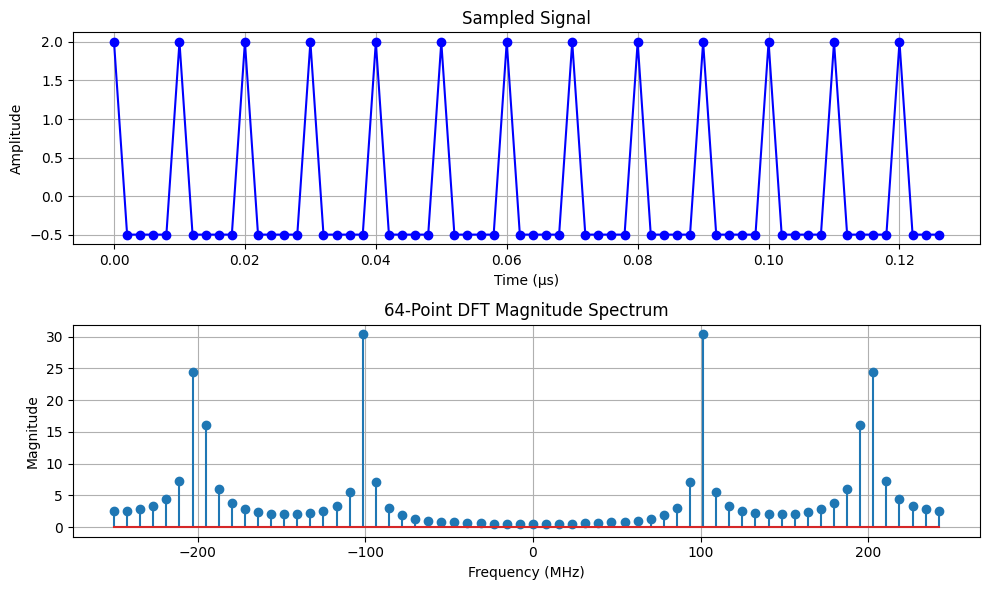

In [82]:
fs = 500e6     
f1 = 200e6
f2 = 400e6
N = 64        

t_sampled = np.arange(N) / fs

x_sampled = np.cos(2 * np.pi * f1 * t_sampled) + np.cos(2 * np.pi * f2 * t_sampled)

# Apply Blackman window
blackman_window = np.blackman(N)
x_windowed = x_sampled * blackman_window

# Compute 64-point DFT using FFT
X = np.fft.fft(x_sampled, N)
X_magnitude = np.abs(X) 
freqs = np.fft.fftfreq(N, 1/fs)

# Shift frequencies for centered spectrum
X_shifted = np.fft.fftshift(X_magnitude)
freqs_shifted = np.fft.fftshift(freqs)


plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_sampled * 1e6, x_sampled, marker='o', linestyle='-', color='b')
plt.xlabel("Time (µs)")
plt.ylabel("Amplitude")
plt.title("Sampled Signal")
plt.grid()

# Plot 64-point DFT magnitude spectrum
plt.subplot(2, 1, 2)
plt.stem(freqs_shifted / 1e6, X_shifted, use_line_collection=True)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.title("64-Point DFT Magnitude Spectrum")
plt.grid()

plt.tight_layout()
plt.show()

Based on simulation, below conclusion can be made,
- without Blackman window, sharp signal trunction in time domain introduces high-frequency leak (>400MHz)
- with Blackman window, high frequency spectrun has been reduced significantly
- Blackman window does not help the undersample result